# Pendahuluan
Kriminalitas adalah suatu pelanggaran hukum yang tidak sesuai dengan norma serta aturan yang terdapat di lingkungan masyarakat. Untuk mencegah terjadinya tindak kriminal yang semakin banyak, diperlukan adanya instansi kepolisian untuk melakukan hal tersebut. Salah satu cara yang dilakukan pihak kepolisian untuk mengurangi terjadinya tindak kriminal adalah pembuatan laporan tindak kriminal yang telah terjadi untuk mengetahui secara detail mengenai tindak kejahatan tersebut. Pembuatan laporan tindak kriminal ini sudah dilakukan oleh pihak Kepolisian Boston untuk mencegah sekaligus mengurang tindak kriminal yang terjadi di Kota Boston.

Pada project ini Kepolisian Boston akan melakukan analisa mengenai **tindak kriminal yang terjadi di Kota Boston** berdasarkan data historikal dari kasus kejahatan.

# Pernyataan Masalah
Secara garis besar, Kepolisian Boston ingin **mengurangi tindak kriminal yang terjadi di Kota Boston**. 

Berdasarkan pernyataan di atas, dapat dirumuskan pertanyaan lanjutan untuk membantu proses analisa yaitu:
1. Apa saja tindak kejahatan yang sering terjadi di Kota Boston?
2. Kota apa yang sering terjadi tindak kriminal?
3. Apakah terdapat kota yang tindak kriminalnya terus meningkat?
4. Bagaimana perubahan jumlah tindak kriminal tiap tahun, bulan, hari, dan jam?
5. Apakah mungkin untuk memprediksi kapan dan di mana tindak kejahatan akan terjadi?

# Data Preparation & Processing
Untuk menjawab pertanyaan masalah di atas, data yang ada perlu diolah dan dianalisa. Sebelum melakukan hal tersebut diperlukan adanya *Data Understanding* dan *Data Cleaning* untuk memahami data serta memastikan data yang ada bisa digunakan untuk analisa. Langkah pertama adalah *import library* yang akan digunakan untuk analisa. 

In [2]:
# Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 

Selanjutnya kita akan read dataset dari direktori local files dan menampilkan 5 data teratas pada dataset.

In [3]:
# Read Data
df = pd.read_csv('crime.csv',encoding='latin-1') 
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# Data Understanding
1. **INCIDENT_NUMBER**: Nomor kasus tindak kriminal  

2. **OFFENSE_CODE**: Kode tindak kriminal
3. **OFFENSE_CODE_GROUP**: Jenis tindak kriminal
4. **OFFENSE_DESCRIPTION**: Deskripsi tindak kriminal
5. **DISTRICT**: Distrik di Boston
6. **REPORTING_AREA**: Area pelaporan tindak kriminal
7. **SHOOTING**: tindak kriminal yang tergolong penembakan
8. **OCCURRED_ON_DATE**: tanggal tindak kriminal terjadi
9. **YEAR**: Tahun kejadian tindak kriminal
10. **MONTH**: Bulan kejadian tindak kriminal
11. **DAY_OF-WEEK**: Hari kejadian tindak kriminal
12. **HOUR**: Jam kejadian tindak kriminal
13. **UCR_PART**: Kelas dari tindak kriminal 
14. **STREET**: nama jalan di kota boston
15. **Lat**: Garis lintang lokasi tindak kriminal
16. **Long**: Garis bujur lokasi tindak kriminal
17. **Location**: Koordinat lokasi kejadian tindak kriminal

berikut merupakan informasi secara general mengenai data yang akan dianalisis

In [4]:
# Cek kolom pada data
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [5]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [6]:
# cek missing value pada Data Frame
df.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [7]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Description', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Description,Number of Unique Value,Unique Value Description
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I18207094..."
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, ..."
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Proper..."
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VE..."
4,DISTRICT,12,"[D14, C11, D4, B3, B2, C6, nan, A1, E5, A7, E1..."
5,REPORTING_AREA,879,"[808, 347, 151, 272, 421, 398, 330, 584, 177, ..."
6,SHOOTING,1,"[nan, Y]"
7,OCCURRED_ON_DATE,233229,"[2018-09-02 13:00:00, 2018-08-21 00:00:00, 201..."
8,YEAR,4,"[2018, 2017, 2016, 2015]"
9,MONTH,12,"[9, 8, 6, 7, 11, 10, 5, 12, 2, 1, 4, 3]"


informasi yang kita dapatkan setelah proses pengecekan Data Frame secara general adalah sebagai berikut:
1. Dataset yang digunakan dalam analisis memiliki 17 kolom dan 319072 baris.
2. Terdapat 6 kolom numerikal dan 11 kolom kategorikal.
3. Terdapat missing value pada kolom district, shooting, ucr, street, lat, dan long.

# Data Cleaning
* missing value pada district, street, dan ucr bisa dibiarkan saja karena jumlahnya sedikit tidak terlalu memengaruhi hasil analisis.
* missing value pada shooting bisa diisi dengan 'N' untuk menandakan bahwa baris tersebut bukan termasuk penembakan.
* missing value pada lat dan long bisa diisi dengan value pada kolom location karena memiliki nilai yang sama.


In [8]:
# mengisi nilai nan pada kolom Shooting
df['SHOOTING']=df['SHOOTING'].fillna('N')

In [9]:
# Cek isi kolom Shooting
df['SHOOTING'].unique()

array(['N', 'Y'], dtype=object)

In [10]:
# mengisi nilai nan pada kolom lat dan long dengan location
df[['Lat','Long']]=df['Location'].str.strip('()').str.split(',',expand=True)

In [11]:
df.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
Lat                        0
Long                       0
Location                   0
dtype: int64

hasil dari pengecekan missing value dapat terlihat bahwa sudah tidak ada missing value pada kolom shooting, lat, dan long. 

# Data Analysis
setelah sudah memahami dan membersihkan data, proses analisa bisa dilakukan untuk menjawab masalah-masalah yang sudah dinyatakan sebelumnya. 

In [12]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.35779134,-71.13937053,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.30682138,-71.06030035,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.34658879,-71.07242943,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.33418175,-71.07866441,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.27536542,-71.09036101,"(42.27536542, -71.09036101)"


## **Jumlah tindak kriminal yang terjadi di Kota Boston**
untuk menjawab pertanyaan pada masalah pertama. berikut merupakan jumlah tindak kriminal terbanyak yang terjadi di Kota Boston

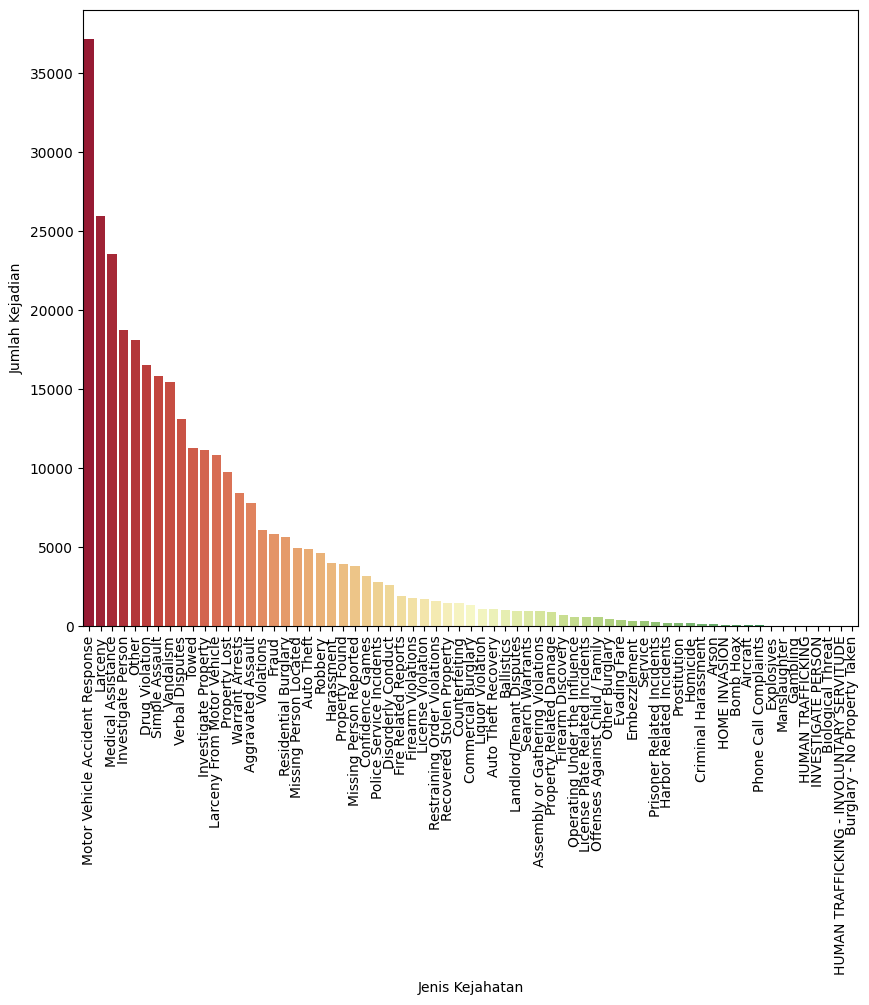

In [30]:
plt.figure(figsize=(10, 8))
sns.barplot(x=df['OFFENSE_CODE_GROUP'].value_counts().index, y=df['OFFENSE_CODE_GROUP'].value_counts(), data=df, palette='RdYlGn')
plt.xlabel('Jenis Kejahatan')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=90)
plt.show()

**Dapat terlihat pada gambar di atas bahwa tindakan kriminal yang paling sering terjadi di Kota Boston adalah kecelakaan kendaraan bermotor.**

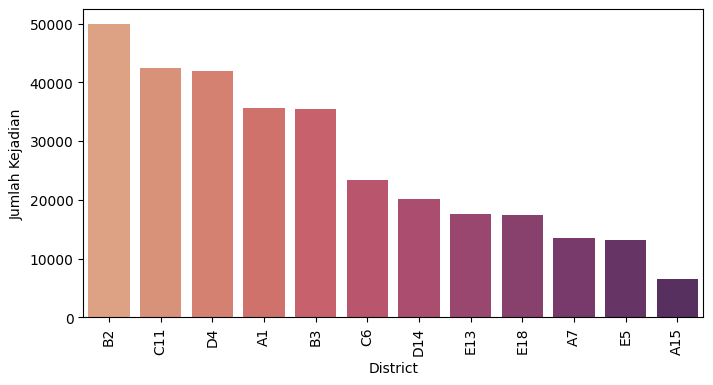

In [14]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['DISTRICT'].value_counts().index, y=df['DISTRICT'].value_counts(), data=df, palette='flare')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=90)
plt.show()

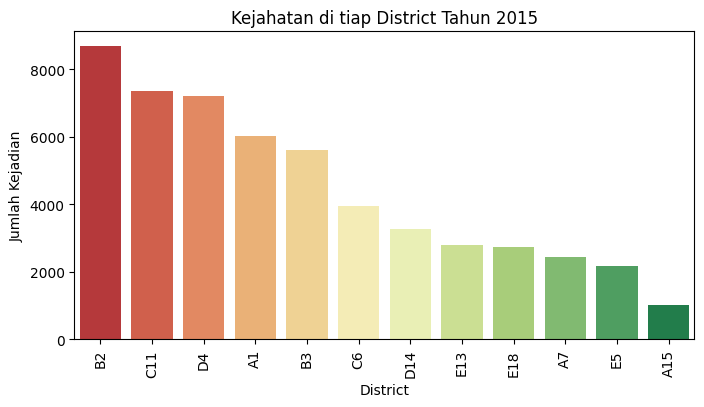

In [15]:
#Tahun 2015
plt.figure(figsize=(8, 4))
sns.barplot(x=df['DISTRICT'].loc[df['YEAR']==2015].value_counts().index, y=df['DISTRICT'].loc[df['YEAR']==2015].value_counts(), data=df, palette='RdYlGn')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')
plt.title('Kejahatan di tiap District Tahun 2015')
plt.xticks(rotation=90)
plt.show()

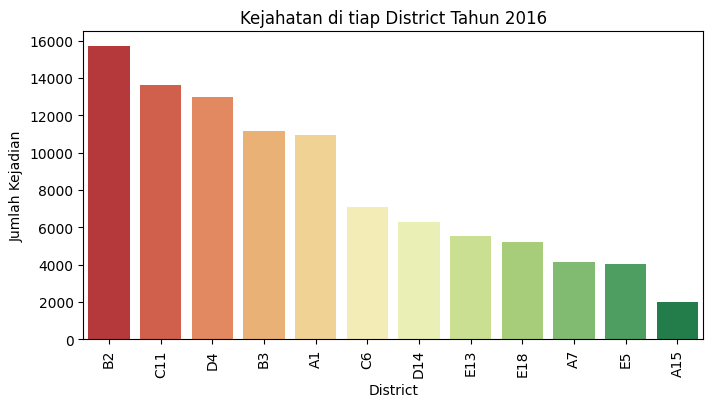

In [16]:
#Tahun 2016
plt.figure(figsize=(8, 4))
sns.barplot(x=df['DISTRICT'].loc[df['YEAR']==2016].value_counts().index, y=df['DISTRICT'].loc[df['YEAR']==2016].value_counts(), data=df, palette='RdYlGn')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')
plt.title('Kejahatan di tiap District Tahun 2016')
plt.xticks(rotation=90)
plt.show()

**angka kejahatan berdasarkan distrik di tiap tahunnya, bisa kita lihat pada tahun 2015 dan 2016 distrik B2 merupakan distrik dengan tindak kriminal terbanyak. namun jika kita lihat ini kenaikan jumlahnya sangat signifikan dari yang awalnya 8000 an pada tahun 2015 meningkat  hampir 2 kali lipat di tahun 2016 menjadi kurang lebih 15.000**

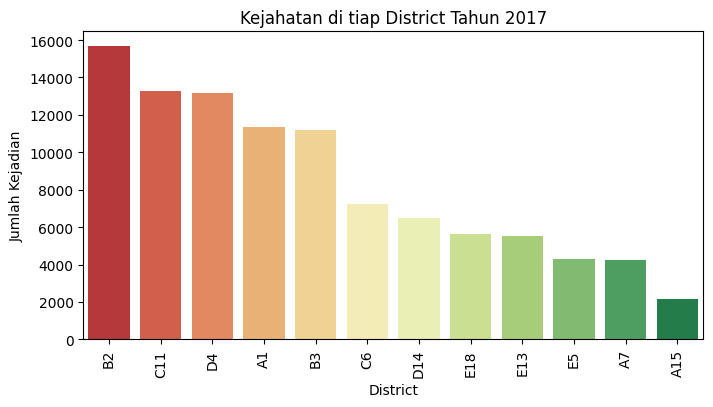

In [17]:
#Tahun 2017
plt.figure(figsize=(8, 4))
sns.barplot(x=df['DISTRICT'].loc[df['YEAR']==2017].value_counts().index, y=df['DISTRICT'].loc[df['YEAR']==2017].value_counts(), data=df, palette='RdYlGn')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')
plt.title('Kejahatan di tiap District Tahun 2017')
plt.xticks(rotation=90)
plt.show()

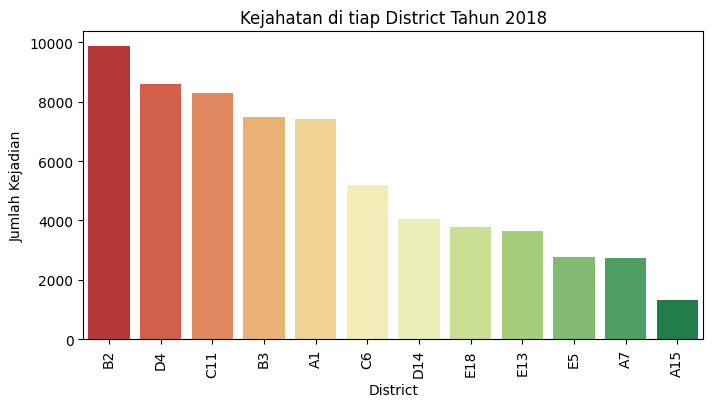

In [18]:
#Tahun 2018
plt.figure(figsize=(8, 4))
sns.barplot(x=df['DISTRICT'].loc[df['YEAR']==2018].value_counts().index, y=df['DISTRICT'].loc[df['YEAR']==2018].value_counts(), data=df, palette='RdYlGn')
plt.xlabel('District')
plt.ylabel('Jumlah Kejadian')
plt.title('Kejahatan di tiap District Tahun 2018')
plt.xticks(rotation=90)
plt.show()

**pada tahun 2017 dan 2018 distrik B2 tetap konsisten menjadi distrik dengan jumlah tindak kejahatan terbanyak di boston. kabar baiknya terdapat penurunan tindak kejahatan yang lumayan signifikan dari 2017 ke 2018.**

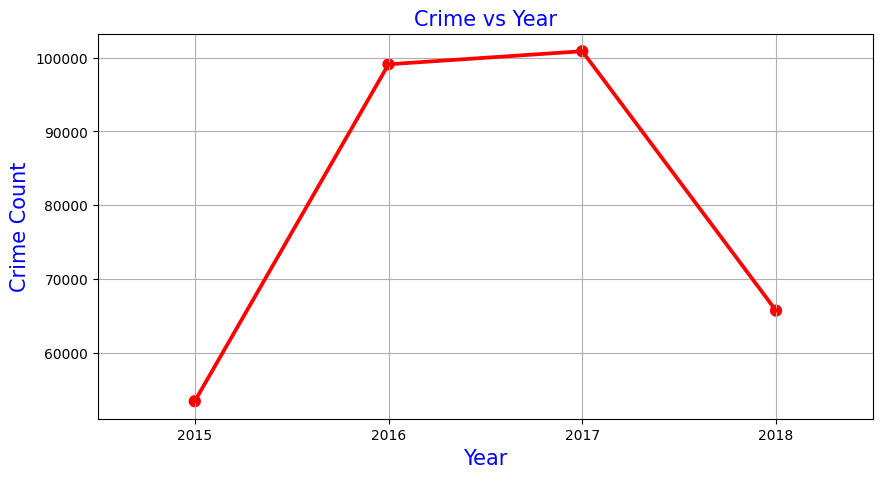

In [19]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df['YEAR'].value_counts().index,y=df['YEAR'].value_counts(),color='red')
plt.xlabel('Year',fontsize = 15,color='blue')
plt.ylabel('Crime Count',fontsize = 15,color='blue')
plt.title('Crime vs Year',fontsize = 15,color='blue')
plt.grid()
plt.show()

**perubahan angka tindak kejahatan berdasarkan tahun. terlihat bahwa tindak kejahatan terbanyak berada pada tahun 2017 dengan kurang lebih 100.000 kasus. tapi ada hal menarik di sini yaitu kenaikan jumlah tindak krjahatan yang sangat signifikan dari 2015 ke 2016 yang jumlahnya hampir 2 kali lipat. kabar baiknya terjadi penurunan angka tindak kriminal yang signifikan dari 2017 ke 2018.**

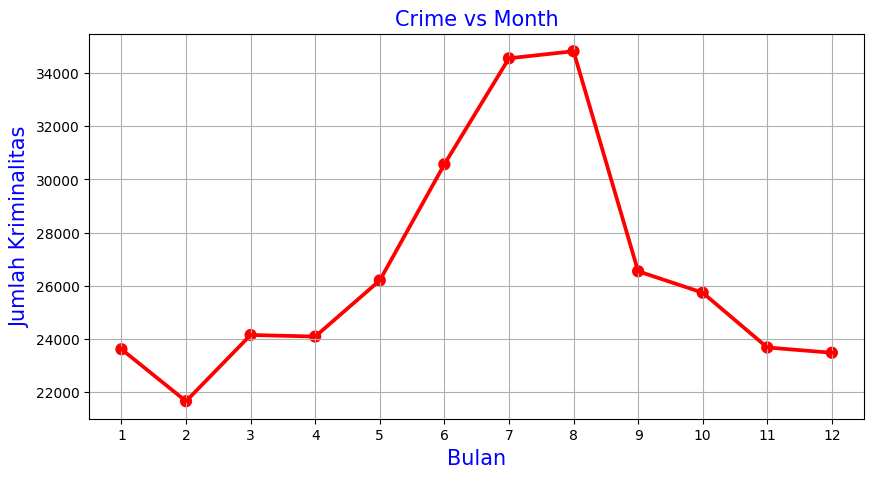

In [20]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df['MONTH'].value_counts().index,y=df['MONTH'].value_counts(),color='red')
plt.xlabel('Bulan',fontsize = 15,color='blue')
plt.ylabel('Jumlah Kriminalitas',fontsize = 15,color='blue')
plt.title('Crime vs Month',fontsize = 15,color='blue')
plt.grid()
plt.show()

**perubahan angka tindak kejahatan berdasarkan bulan, tertinggi di bulan agustus dengan kurang lebih 34.000 kasus. jika dilihat berdasarkan bulannya fluktuasi nya tidak begitu terlihat.**

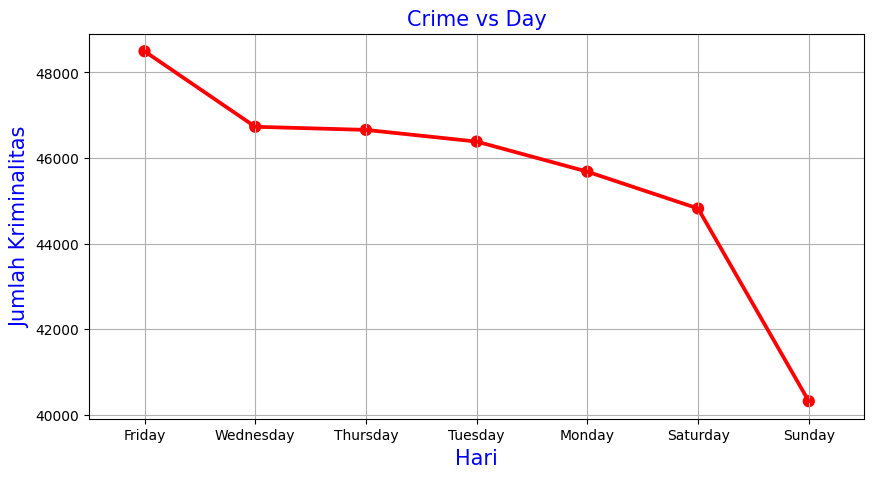

In [21]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df['DAY_OF_WEEK'].value_counts().index,y=df['DAY_OF_WEEK'].value_counts(),color='red')
plt.xlabel('Hari',fontsize = 15,color='blue')
plt.ylabel('Jumlah Kriminalitas',fontsize = 15,color='blue')
plt.title('Crime vs Day',fontsize = 15,color='blue')
plt.grid()
plt.show()

**perubahan angkat tindak kejahatan berdasarkan hari, tertinggi pada hari jumat dengan kurang lebih 48.000 kasus. dan sama seperti pada bulan yang perubahannya juga tidak signifikan.**

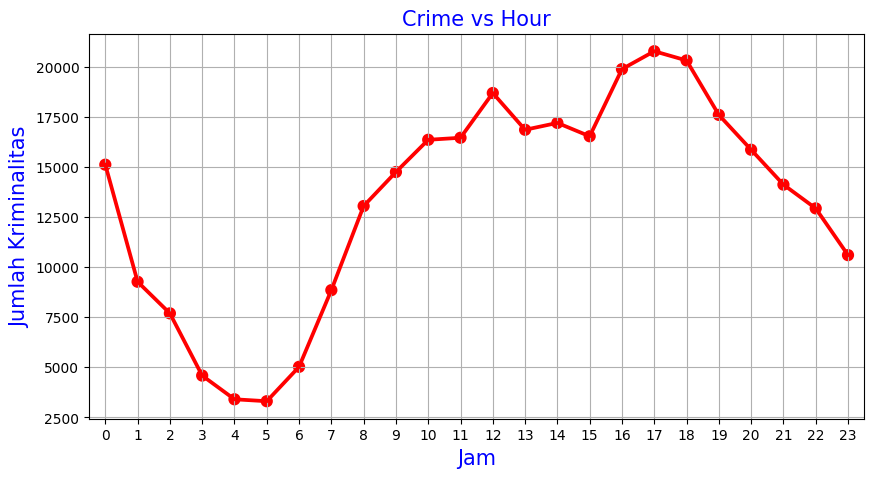

In [22]:
plt.figure(figsize=(10,5))
sns.pointplot(x=df['HOUR'].value_counts().index,y=df['HOUR'].value_counts(),color='red')
plt.xlabel('Jam',fontsize = 15,color='blue')
plt.ylabel('Jumlah Kriminalitas',fontsize = 15,color='blue')
plt.title('Crime vs Hour',fontsize = 15,color='blue')
plt.grid()
plt.show()

**perubahan angka tindak kejahatan berdasarkan jam, tertinggi pada jam 5 sore dengan kurang lebih 20.000 kasus. di sini terlihat data sangat fluktuatif**

In [ ]:
print('== B2 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='B2'].value_counts().head(10),'\n\n')
print('== C11 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='C11'].value_counts().head(10),'\n\n')
print('== D4 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='D4'].value_counts().head(10),'\n\n')
print('== A1 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='A1'].value_counts().head(10),'\n\n')
print('== B3 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='B3'].value_counts().head(10),'\n\n')
print('== C6 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='C6'].value_counts().head(10),'\n\n')
print('== D14 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='D14'].value_counts().head(10),'\n\n')
print('== E13 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='E13'].value_counts().head(10),'\n\n')
print('== E18 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='E18'].value_counts().head(10),'\n\n')
print('== A7 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='A7'].value_counts().head(10),'\n\n')
print('== E5 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='E5'].value_counts().head(10),'\n\n')
print('== A15 ==\n\n',df['OFFENSE_CODE_GROUP'].loc[df['DISTRICT']=='A15'].value_counts().head(10),'\n\n')

== B2 ==

 Motor Vehicle Accident Response    6407
Medical Assistance                 3353
Other                              3325
Verbal Disputes                    3008
Larceny                            2871
Investigate Person                 2747
Simple Assault                     2510
Vandalism                          2436
Drug Violation                     2269
Investigate Property               1703
Name: OFFENSE_CODE_GROUP, dtype: int64 


== C11 ==

 Motor Vehicle Accident Response    5305
Medical Assistance                 3274
Investigate Person                 2681
Verbal Disputes                    2617
Other                              2436
Vandalism                          2410
Drug Violation                     2209
Larceny                            2183
Simple Assault                     2125
Investigate Property               1356
Name: OFFENSE_CODE_GROUP, dtype: int64 


== D4 ==

 Larceny                            7313
Motor Vehicle Accident Response    3882
Me

**berdasarkan analisa sebelumnya, sekarang kita lihat jenis-jenis dan jumlah tindak kejahatan berdasarkan nilai tertinggi pada penelitian sebelumnya.
distrik B2 merupakan distrik dengan jumlah kejahatan terbanyak. bisa dilihat bahwa kecelakaan kendaraan bermotor menempati urutan 1  dan terdapat kejahatan berat (kelas 1 ) seperti pencurian pada posisi ke 5.**

In [40]:
df['OFFENSE_CODE_GROUP'].loc[df['YEAR']==2017].value_counts().head(10)

Motor Vehicle Accident Response    12049
Medical Assistance                  7817
Larceny                             7807
Investigate Person                  6659
Other                               5323
Simple Assault                      4896
Vandalism                           4837
Drug Violation                      4759
Verbal Disputes                     4436
Investigate Property                3972
Name: OFFENSE_CODE_GROUP, dtype: int64

**tindak kejahatan pada tahun 2017, masih kecelakaan yang tertinggi, diikuti oleh pencurian di peringkat ke 3.**

In [ ]:
df['OFFENSE_CODE_GROUP'].loc[df['MONTH']==8].value_counts().head(10)

Motor Vehicle Accident Response    3980
Larceny                            2972
Medical Assistance                 2278
Investigate Person                 2167
Other                              2010
Vandalism                          1795
Drug Violation                     1692
Simple Assault                     1675
Verbal Disputes                    1464
Towed                              1347
Name: OFFENSE_CODE_GROUP, dtype: int64

**tindak kejahatan pada bulan agustus, terlihat ya kecelakaan masih konsisten posisi 1 diikuti oleh pencurian di posisi 2**

In [ ]:
df['OFFENSE_CODE_GROUP'].loc[df['DAY_OF_WEEK']=='Friday'].value_counts().head(10)

Motor Vehicle Accident Response    5852
Larceny                            3959
Medical Assistance                 3381
Investigate Person                 2928
Drug Violation                     2700
Other                              2693
Simple Assault                     2374
Vandalism                          2228
Verbal Disputes                    1772
Investigate Property               1644
Name: OFFENSE_CODE_GROUP, dtype: int64

**kejahatan pada hari jumat, kecelakaan posisi 1 dan pencurian posisi 2. di sini terlihat angka kecelakaan dan pencurian berdampingan.**

In [41]:
df['OFFENSE_CODE_GROUP'].loc[df['HOUR']==0].value_counts().head(10)

Motor Vehicle Accident Response    1190
Larceny                             997
Medical Assistance                  936
Simple Assault                      858
Vandalism                           816
Investigate Person                  766
Other                               739
Property Lost                       615
Fraud                               604
Investigate Property                566
Name: OFFENSE_CODE_GROUP, dtype: int64

**kejahatan pada pukul 5 sore atau jam sibuk, masih terlihat kecelakaan nomor 1 dan diikuti pencurian di nomor 3.**

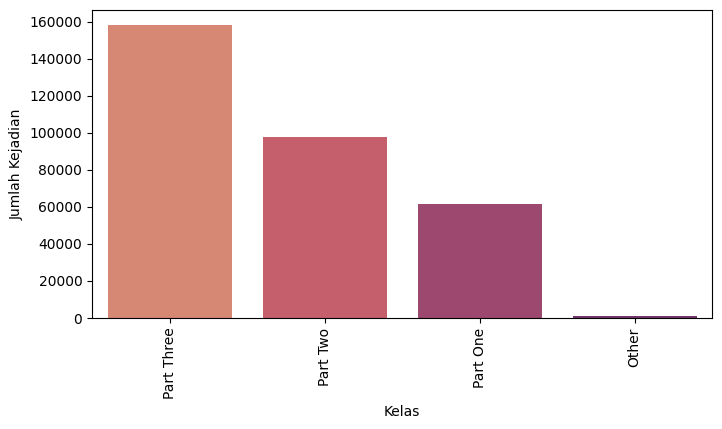

In [37]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['UCR_PART'].value_counts().index, y=df['UCR_PART'].value_counts(), data=df, palette='flare')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Kejadian')
plt.xticks(rotation=90)
plt.show()

**selanjutnya kita cek sebenarnya kejahatan di boston ini termasuk kelas apa. oke dapat dilihat pada visualisai bahwa kejahatan ringan terbanyak dan yang diikuti oleh kejahatan sedang dan berat.**

In [35]:
print('\n==Kelas 1==\n',df['OFFENSE_CODE_GROUP'].loc[df['UCR_PART']=='Part One'].value_counts())
print('\n==Kelas 2==\n',df['OFFENSE_CODE_GROUP'].loc[df['UCR_PART']=='Part Two'].value_counts())
print('\n==Kelas 3==\n',df['OFFENSE_CODE_GROUP'].loc[df['UCR_PART']=='Part Three'].value_counts())
print('\n==Lainnya==\n',df['OFFENSE_CODE_GROUP'].loc[df['UCR_PART']=='Other'].value_counts())


==Kelas 1==
 Larceny                       25935
Larceny From Motor Vehicle    10847
Aggravated Assault             7807
Residential Burglary           5606
Auto Theft                     4851
Robbery                        4624
Commercial Burglary            1337
Other Burglary                  461
Homicide                        161
Name: OFFENSE_CODE_GROUP, dtype: int64

==Kelas 2==
 Other                              17089
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Violations                          6095
Fraud                               5829
Harassment                          4007
Confidence Games                    3147
Disorderly Conduct                  2611
Firearm Violations                  1777
Restraining Order Violations        1607
Recovered Stolen Property           1455
Counterfeiting                      1454
Liquor Violation                    1052
Ballistics                         

**berdasarkan perhitungan jumlah tindak kriminal yang terjadi berdasarkan kelasnya. kita dapat melihat bahwa pada tindak kejahatan kelas 1 (berat) yaitu pencurian yang memiliki jumlah terbanyak kedua setelah kecelakaan kendaraan bermotor. hal ini perlu diperhatikan karena ini termasuk kejahatan  kelas berat sehingga sangat membahayakan masyarakat Kota Boston. kita juga dapat melihat bahwa tindak kejahatan kelas 3 (ringan) yaitu kecelakaan kendaraan bermotor yang memiliki jumlah kejadian terbanyak.**

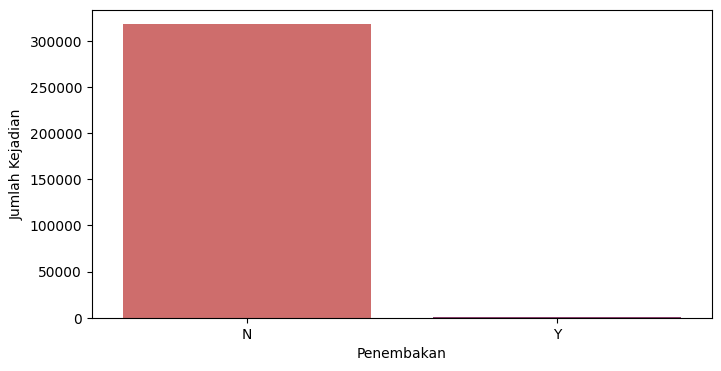

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['SHOOTING'].value_counts().index, y=df['SHOOTING'].value_counts(), data=df, palette='flare')
plt.xlabel('Penembakan')
plt.ylabel('Jumlah Kejadian')
plt.show()

**kemudian saya melakukan pengecekan pada kolom shooting untuk memastikan jumlah tindak kejahatan dengan senjata yang terjadi. dapat dilihat di visualisasi ternyata jumlahnya hanya sedikit sehingga saya mengasumsikan bahwa polisi sudah cukup baik menangani masalah ini.**

## **Kesimpulan**
1. tindak kriminal yang paling banyak terjadi adalah kecelakaan namun kita tidak bisa mengabaikan tindak kriminal pencurian karena jumlahnya sangat banyak dan termasuk kejahatan kelas 1.
2. distrik yang jumlah tindak kriminalnya paling banyak adalah B2 sehingga perlu adanya perhatian khusus untuk distrik ini
3. tidak ada distrik yang jumlah kriminalnya terus meningkat maka diasumsikan bahwa terdapat improvement dari tindakan yang sudah dilakukan sebelumnya.
4. terdapat penurunan angka kejahatan berdasarkan waktunya walaupun angkanya tidak signifikan.
5. sangat sulit bahkan tidak mungkin untuk memprediksi kapan dan di mana akan terjadinya tindak kejahatan dengan data ini

## **Saran dan Rekomendasi**
1. persebaran anggota kepolisian tetap fokus pada kejahatan kelas 1 karena walaupun kejahatn terbanyak adalah kecelakaan tetapi itu termasuk kejahatn ringan.
2. menambah jumlah anggota kepolisian di jalan raya terutama pada jam sibuk untuk mengurangi kecelakaan yang terjadi.
3. pihak kepolisian perlu membuat data tambahan yang lebih detail seperti zona pejalan kaki, tipe jalam, dan yang lainnya supaya bisa prediksi tindak kejahatan yang akan terjadi.
